In [2]:
! pip install 'cebra[dev,demos]' 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.2/202.2 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.6/515.6 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.3/92.3 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 kB 51.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.0/334.0 kB 56.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 103.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.5/183.5 kB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [3]:
import sys
import os # my addtion

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

from scipy.integrate import solve_ivp
import cebra.datasets
from cebra import CEBRA
import torch
import d_library as dl


/opt/conda/lib/python3.9/site-packages/cebra/datasets/__init__.py:103: UserWarning: Could not initialize one or more datasets: No module named 'h5py'. For using the datasets, consider installing the [datasets] extension via pip.
  warnings.warn(f"Could not initialize one or more datasets: {e}. "


## Lorenz Attractor Analysis

In this capsule, we will run a dimension reduction analysis on the lorenz attractor.

In [4]:
# set max iterations
iterations = 1000

In [1]:
# Make a function to build a model, train it and then compute an embedding

def get_embed(input, dimension=3):

    # build CEBRA time model
    model = CEBRA(model_architecture='offset10-model',
                         batch_size=512,
                         learning_rate=0.01,
                         temperature=1,
                         output_dimension = int(dimension),
                         max_iterations=iterations,
                         distance='euclidian',
                         conditional='time',
                         device='cuda_if_available',
                         num_hidden_units=64,
                         verbose=True,
                         time_offsets=1)

    model.fit(input)
    embedding = model.transform(input)


    return model, embedding


In [6]:
# define a function to make a lorenz system
def lorenz(t, xyz, sigma=10, rho=28, beta=8/3):
    x, y, z = xyz
    dxdt = sigma * (y - x)
    dydt = rho * x - y - x * z
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [7]:
# Define parameters and initial conditions
sigma = 10
rho = 28
beta = 8/3
initial_conditions = [0, 2, 0]  # Initial conditions for [x, y, z]

# Time span for integration
t_span = [0, 35]

In [8]:
# Solve the differential equations
solution = solve_ivp(lorenz, t_span, initial_conditions, args=(sigma, rho, beta), dense_output=True)

# Generate time points for plotting
t = np.linspace(t_span[0], t_span[1], 10000)

In [9]:
# Evaluate the solution at the time points
xyz = solution.sol(t)

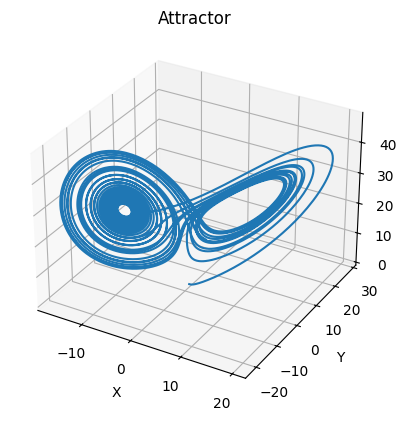

In [10]:
%matplotlib inline
# Plot the Lorenz attractor
def plot_lorenz(coords):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(coords[0], coords[1], coords[2], alpha=1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Attractor')
    plt.show()


plot_lorenz(xyz)

In [11]:
# check the shape of the object
xyz.shape

(3, 10000)

In [12]:
# reshape it for use with cebra
lorenz_obj = xyz.reshape(10000,3)
lorenz_obj.shape

(10000, 3)

In [13]:
# now get embeddings with different output dimensions
model_l1, embed_l1 = get_embed(lorenz_obj, dimension=1)
model_l2, embed_l2 = get_embed(lorenz_obj, dimension=2)
model_l3, embed_l3 = get_embed(lorenz_obj, dimension=3)
model_l4, embed_l4 = get_embed(lorenz_obj, dimension=4)
model_l5, embed_l5 = get_embed(lorenz_obj, dimension=5)
model_l8, embed_l8 = get_embed(lorenz_obj, dimension=8)


  0%|          | 0/1000 [00:00<?, ?it/s]/opt/conda/lib/python3.9/site-packages/torch/nn/modules/conv.py:309: UserWarning: Applied workaround for CuDNN issue, install nvrtc.so (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:80.)
  return F.conv1d(input, weight, bias, self.stride,
pos: -1.0000 neg:  7.2383 total:  6.2383 temperature:  1.0000: 100%|██████████| 1000/1000 [00:13<00:00, 72.90it/s]
pos: -0.9957 neg:  6.4739 total:  5.4782 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 151.01it/s]
pos: -0.9950 neg:  6.4095 total:  5.4145 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 150.44it/s]
pos: -0.9946 neg:  6.3632 total:  5.3686 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 149.97it/s]
pos: -0.9953 neg:  6.3477 total:  5.3524 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 153.17it/s]
pos: -0.9931 neg:  6.3159 total:  5.3228 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 151.36it/s]


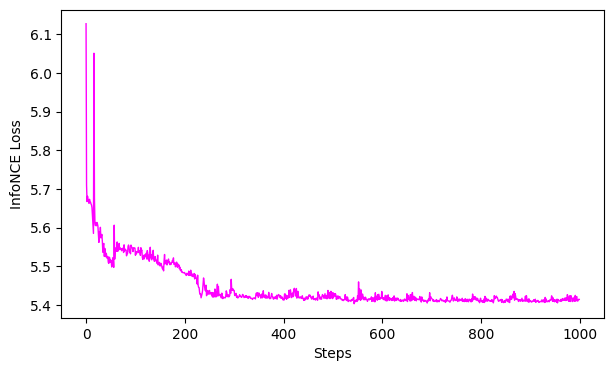

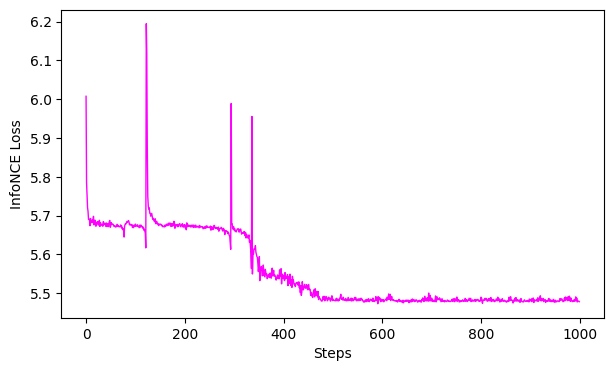

In [14]:
# display the loss of the models during training
ax = cebra.plot_loss(model_l3)
ax1 = cebra.plot_loss(model_l2)

<Axes: title={'center': 'Embedding'}>

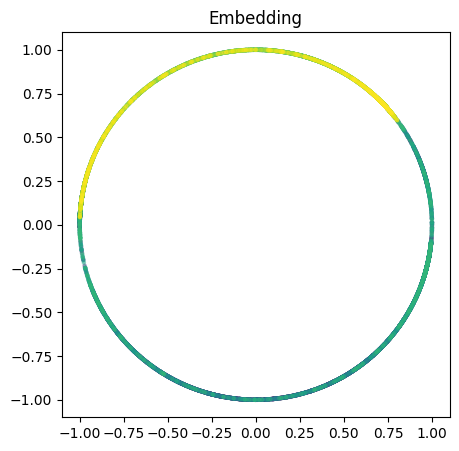

In [15]:
# Let's visualize them
cebra.plot_embedding(embedding=embed_l2, embedding_labels='time', markersize=5)

<Axes3D: title={'center': 'Embedding'}>

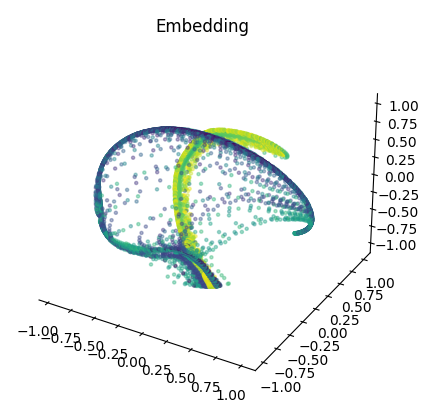

In [16]:
cebra.plot_embedding(embedding=embed_l3, embedding_labels='time', markersize=5)

<Axes3D: title={'center': 'Embedding'}>

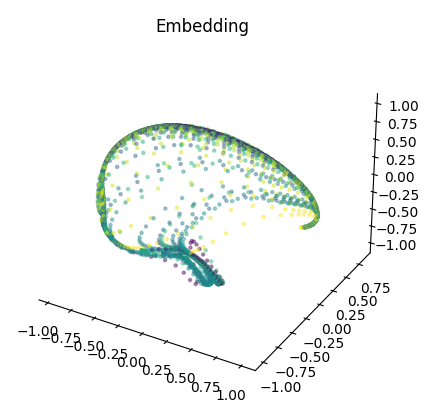

In [17]:
cebra.plot_embedding(embedding=embed_l3[0:5000,:], embedding_labels='time', markersize=5)

In [18]:
lorenz_input = [lorenz_obj]

In [19]:
# Create a grid of 2 rows and 3 columns
def embed_attractor(attractor):

   # get embeddings in 2D and 3D
   attractor_input = attractor.reshape(attractor.shape[1],attractor.shape[0])
   model_pl2, embed_pl2 = get_embed(attractor_input, dimension=2)
   model_pl3, embed_pl3 = get_embed(attractor_input, dimension=3)

   for i in range(0,attractor.shape[1],1000):

        attractor_p = attractor[:,0:i+1000]

        # define the grid
        gs = gridspec.GridSpec(2, 2, figure=plt.figure(figsize=(10,10)))

        # plot portion of attractor
        ax1 = plt.subplot(gs[0, :], projection='3d')  
        ax1.plot(attractor_p[0], attractor_p[1], attractor_p[2], alpha=1)
        plt.title('Timestep {}'.format(i+1000))

        # plot embeddings
        ax2 = plt.subplot(gs[1,0])
        cebra.plot_embedding(embedding=embed_pl2[0:i+1000,:], embedding_labels='time', markersize=5, ax=ax2, title='2D')
        ax3 = plt.subplot(gs[1,1], projection='3d')
        cebra.plot_embedding(embedding=embed_pl3[0:i+1000,:], embedding_labels='time', markersize=5,ax=ax3, title='3D')
        
        plt.show()


pos: -0.9975 neg:  6.4817 total:  5.4842 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 149.16it/s]
pos: -0.9945 neg:  6.4054 total:  5.4109 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 154.28it/s]


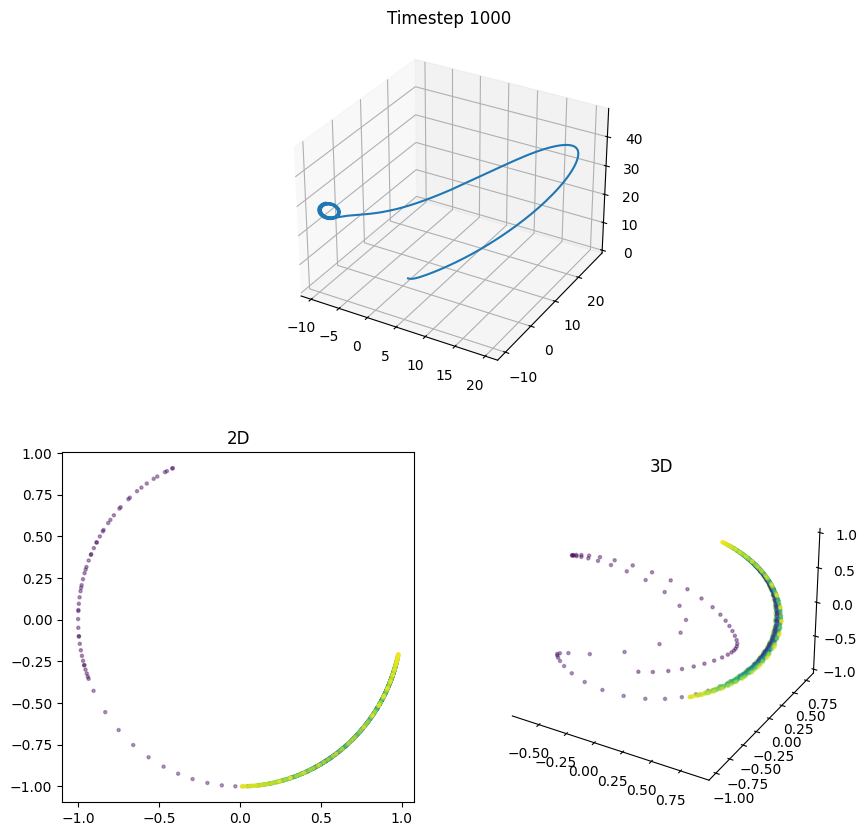

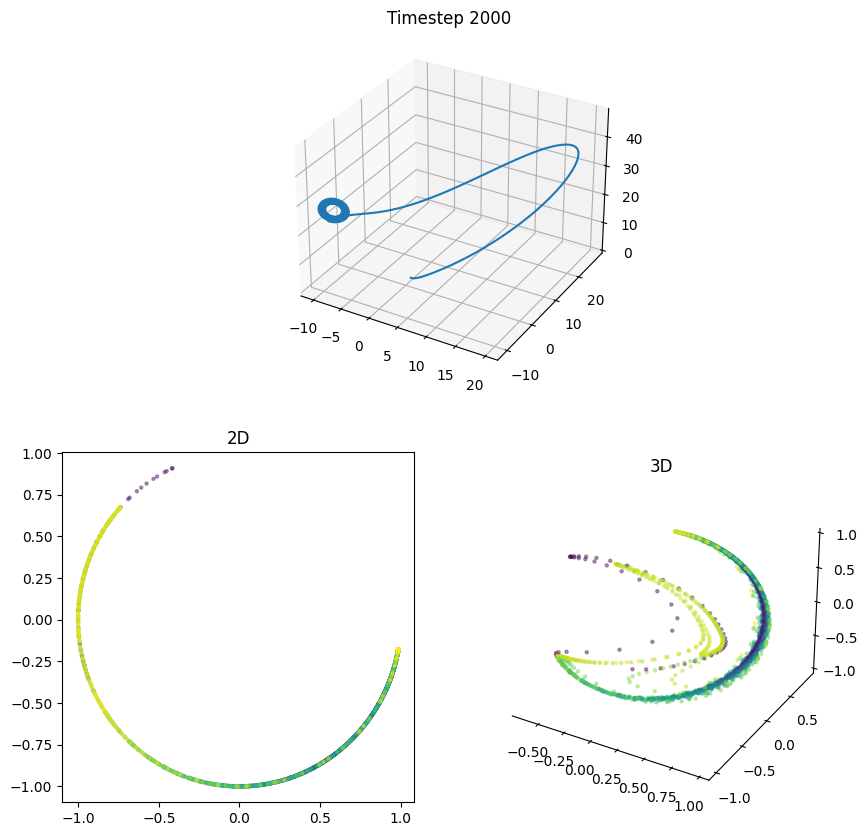

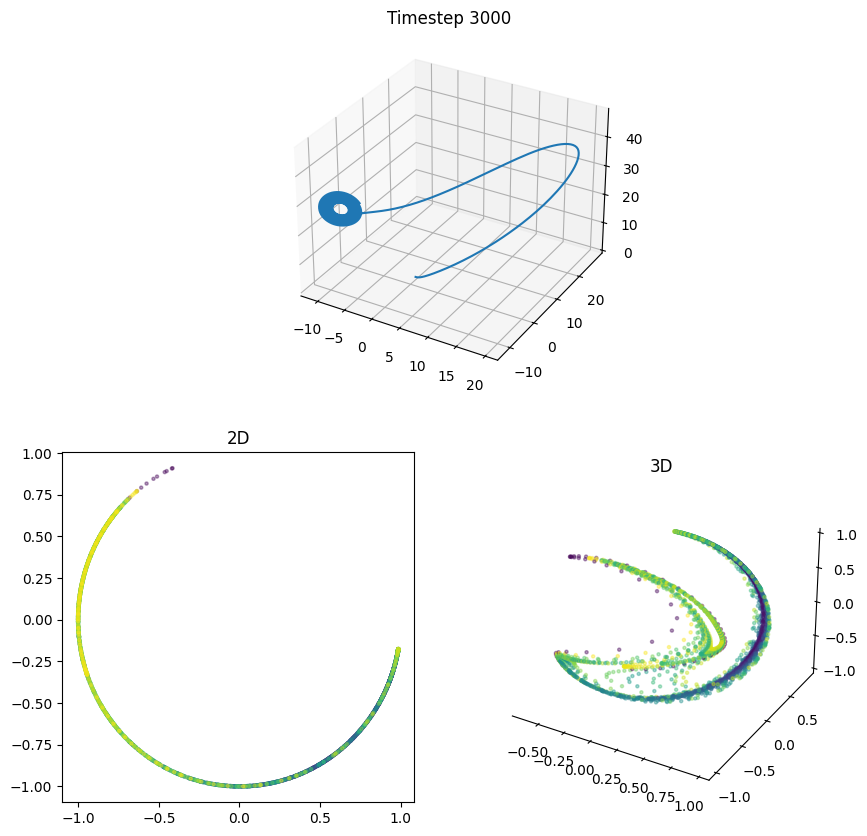

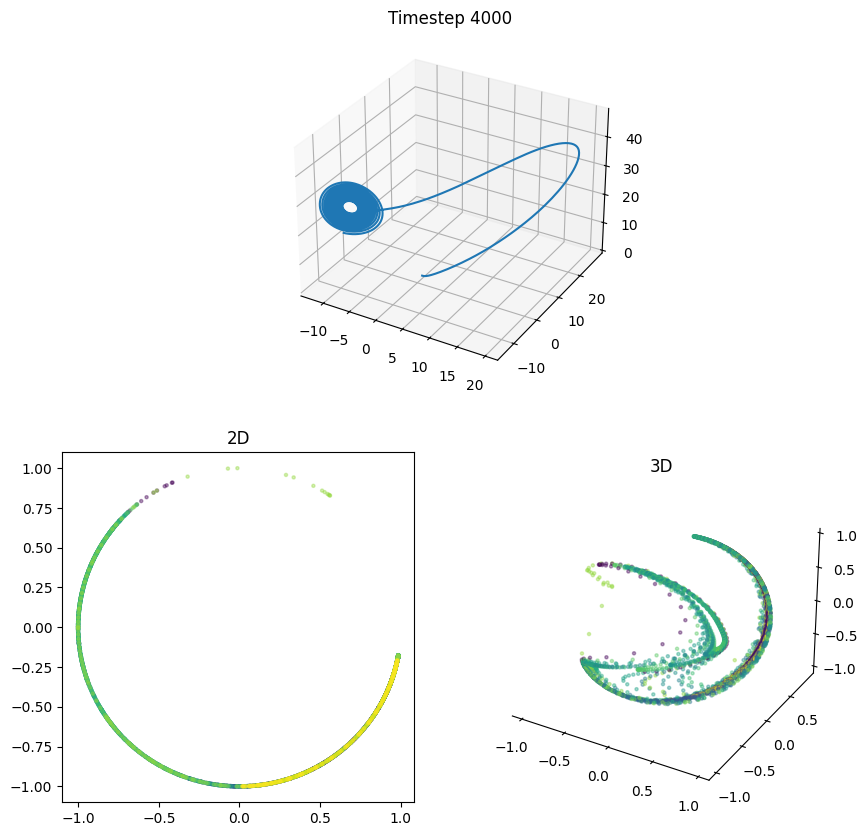

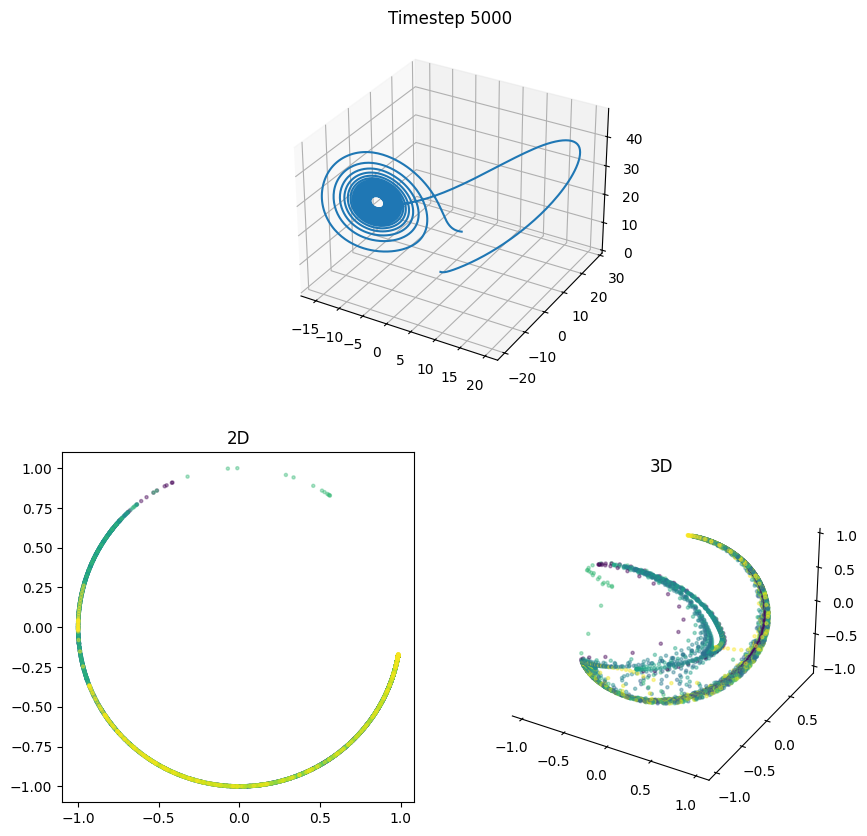

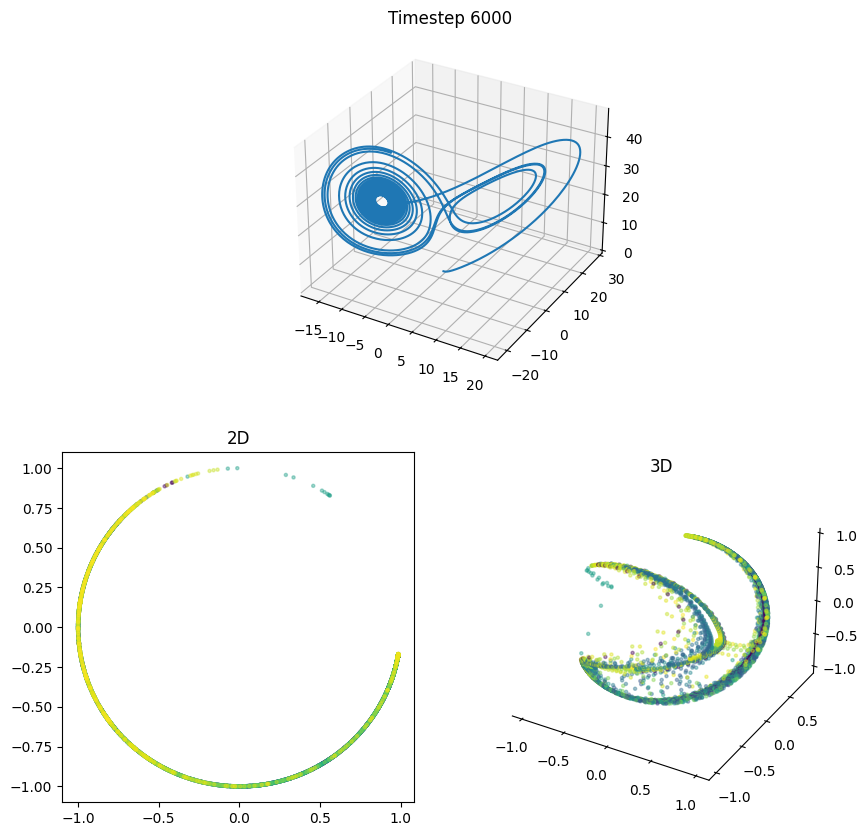

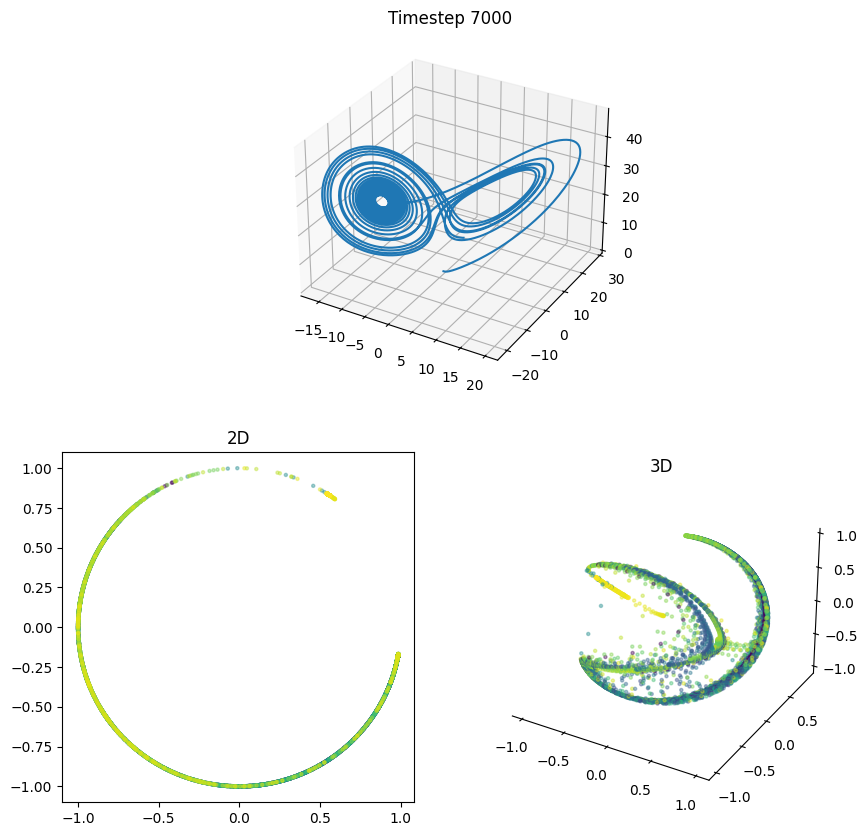

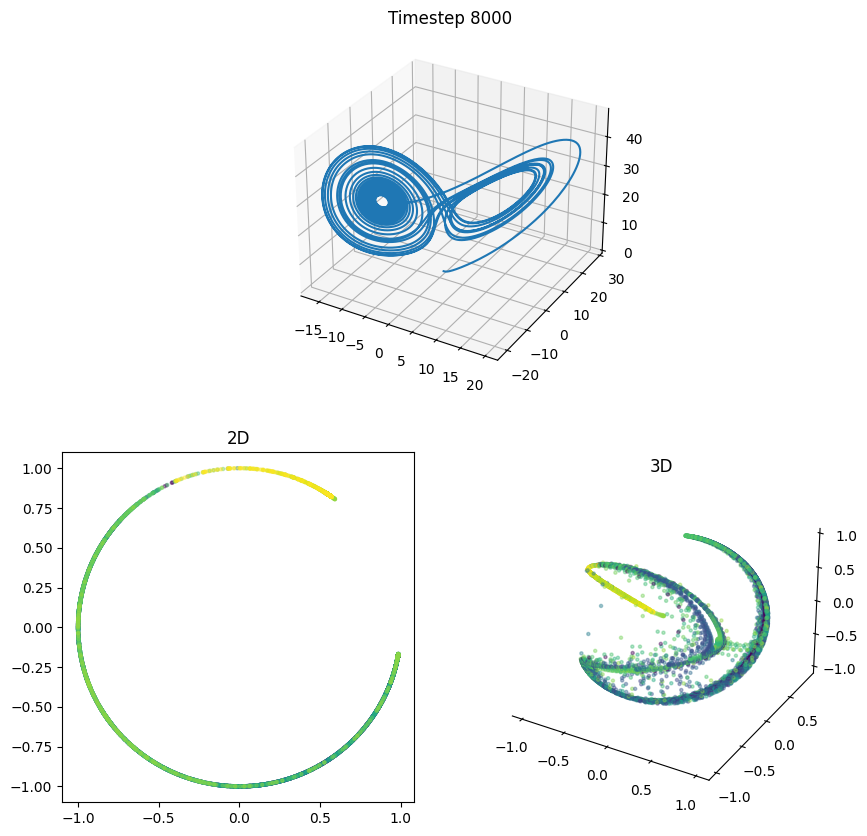

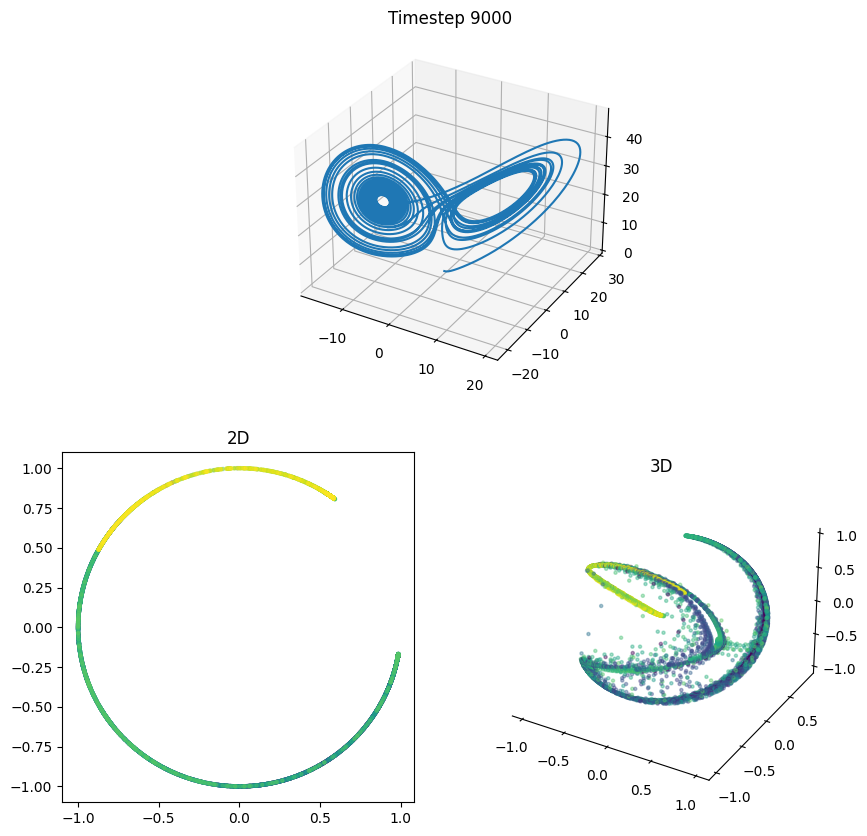

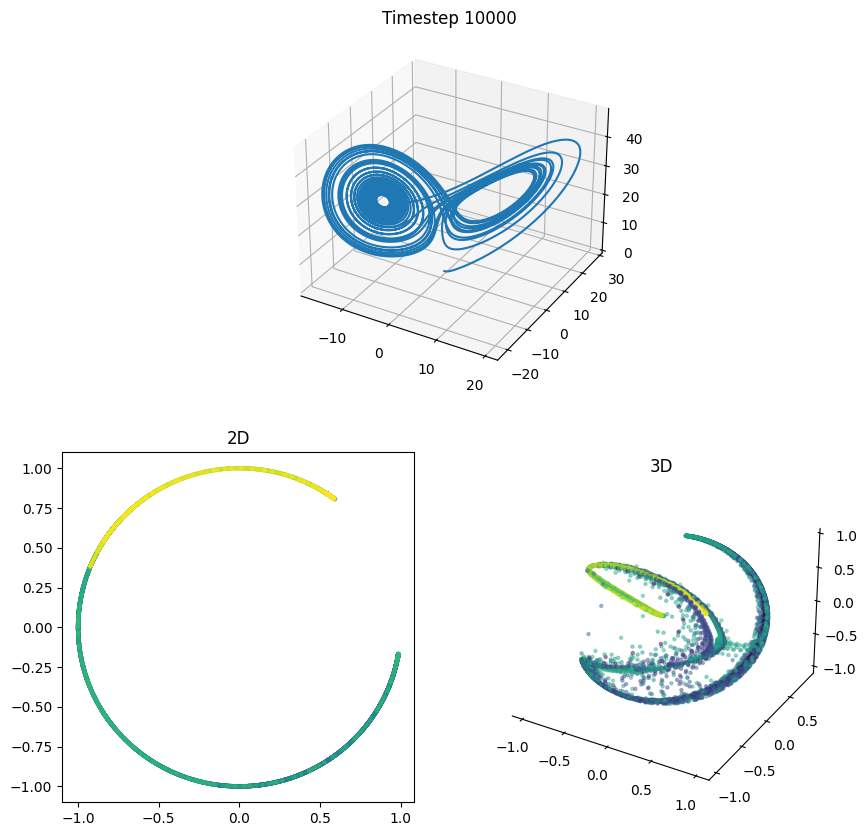

In [20]:
embed_attractor(xyz)

In [24]:
r2_sequence_l = dl.r2_vs_dimension(lorenz_input, dimensionality=[1,2,3,4,5], labels=['lorenz attractor'])

pos: -1.0000 neg:  7.2383 total:  6.2383 temperature:  1.0000: 100%|██████████| 1000/1000 [00:06<00:00, 160.00it/s]
pos: -0.9883 neg:  6.6696 total:  5.6814 temperature:  1.0000:  59%|█████▉    | 588/1000 [00:03<00:02, 158.71it/s]
/opt/conda/lib/python3.9/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


KeyboardInterrupt: 